EXPERIMENTx6 BY 229X1A2856

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math


In [ ]:
# Load the dataset
data = pd.read_csv('/content/hp_data.csv')


In [ ]:
# Display basic dataset information
print("First 5 rows:")
print(data.head())
print("\nLast 5 rows:")
print(data.tail())
print("\nDataset Description:")
print(data.describe())

First 5 rows:
   Unnamed: 0     price       place                 built  sqft    sale  \
0        1341   6300000  BTM Layout  Super built-up  Area  1450  Resale   
1        2126  11500000   Yelahanka  Super built-up  Area  2190  Resale   
2         816   3800000  Whitefield  Super built-up  Area  1019  Resale   
3        2708  10500000  Ambalipura  Super built-up  Area  1857  Resale   
4        1041  11500000   Yelahanka  Super built-up  Area  2190  Resale   

   yearsOld  floor  totalFloor  bhk  
0         5      1           4    1  
1         5      3           5    3  
2         1      2           5    2  
3        15      4           5    4  
4         5      3           5    3  

Last 5 rows:
      Unnamed: 0    price                 place                 built  sqft  \
3495         636  3800000            Whitefield  Super built-up  Area  1019   
3496        1664  6300000            BTM Layout  Super built-up  Area  1450   
3497        1252  7350000        Yelachenahalli  Super b

In [ ]:
# Data Preprocessing
# Remove null values
data.dropna(inplace=True)

In [ ]:
# Remove duplicates
data.drop_duplicates(inplace=True)

In [ ]:
# Encode categorical variables
if 'place' in data.columns:
    enc = LabelEncoder()
    data['place'] = enc.fit_transform(data['place'])

In [ ]:
# Define input and output variables
X = data[['sqft', 'place', 'yearsOld', 'totalFloor', 'bhk']]
y = data['price']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_predict = model.predict(X_test)

In [ ]:
# Model evaluation
r2 = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = math.sqrt(mse)

In [ ]:
# Extract model parameters
intercept = model.intercept_
coefficients = model.coef_

In [ ]:
# Print evaluation results
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")
print(f"R² Score: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

Intercept: -11264038.119324543
Coefficients: [    8555.41771712    18166.30464948   140586.56937903  1894570.76009974
 -1679228.3559922 ]
R² Score: 0.8576243091412104
MAE: 1374817.995750236
MSE: 2970942663157.3867
RMSE: 1723642.2665847419


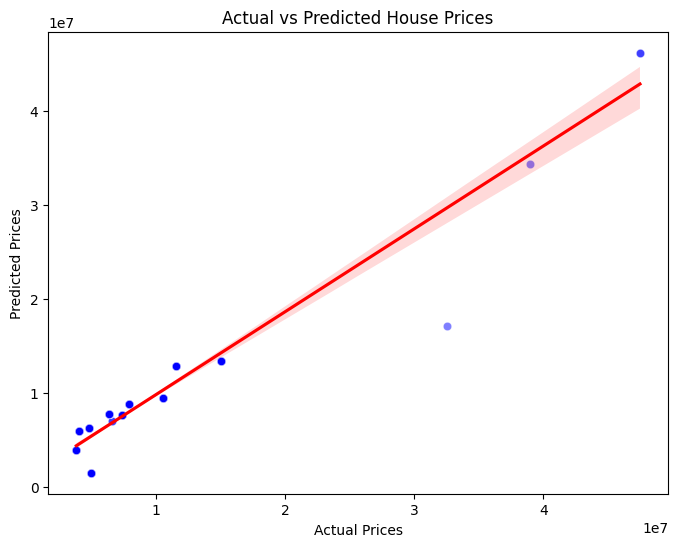

In [ ]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_predict, color='blue', alpha=0.5)

# Best fit line
sns.regplot(x=y_test, y=y_predict, scatter=False, color='red')

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


MULTI-REGRESSION!!!

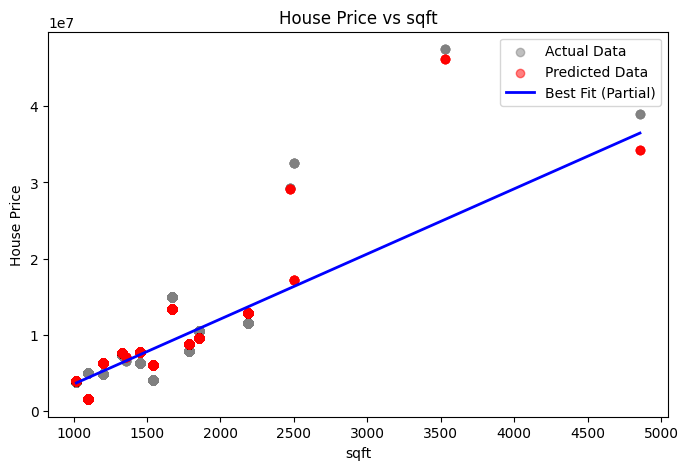

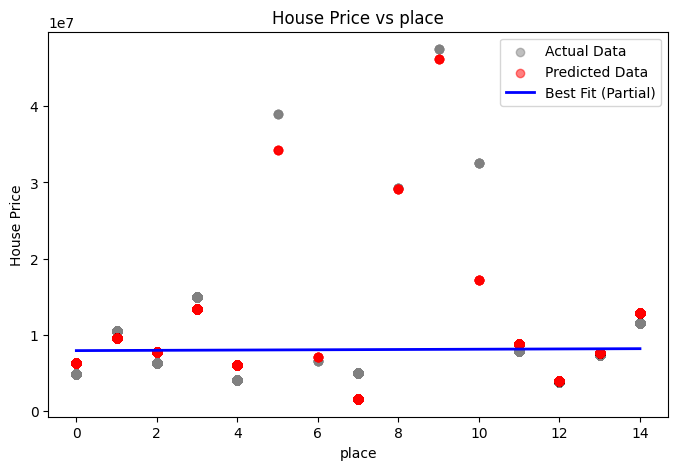

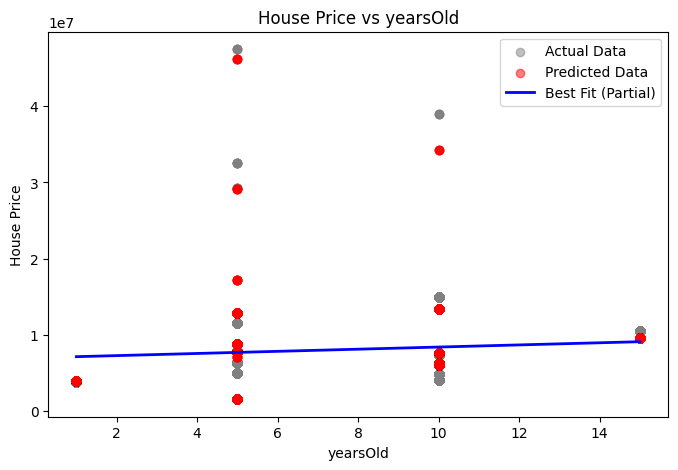

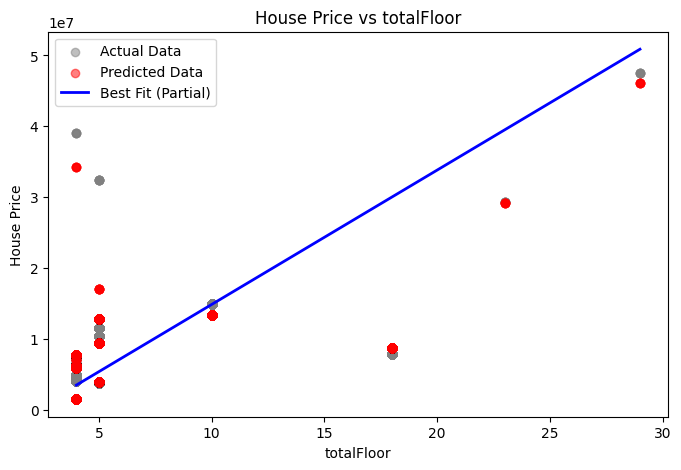

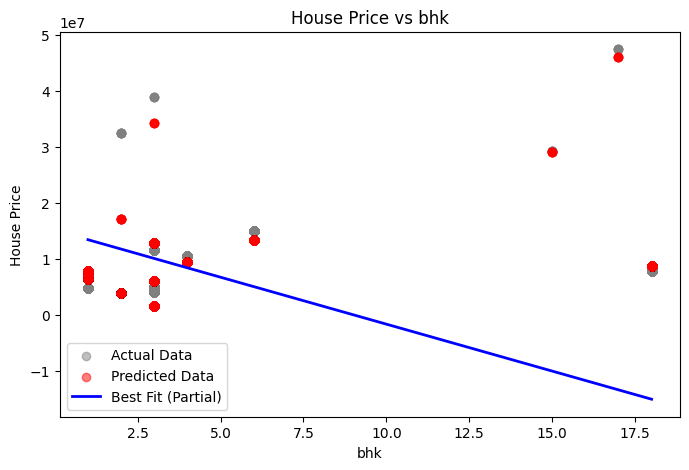

In [ ]:
import numpy as np
y_pred_all = model.predict(X)

features = ['sqft', 'place', 'yearsOld', 'totalFloor', 'bhk']
for feature in features:
    plt.figure(figsize=(8, 5))
    plt.scatter(data[feature], data['price'], color='grey', alpha=0.5, label='Actual Data')
    plt.scatter(data[feature], y_pred_all, color='red', alpha=0.5, label='Predicted Data')
    feature_range = np.linspace(data[feature].min(), data[feature].max(), 100)
    temp_data = {col: np.full(100, data[col].mean()) for col in features}
    temp_data[feature] = feature_range
    X_temp = pd.DataFrame(temp_data)
    y_temp = model.predict(X_temp)
    plt.plot(feature_range, y_temp, color='blue', linewidth=2, label='Best Fit (Partial)')
    plt.xlabel(feature)
    plt.ylabel('House Price')
    plt.title(f'House Price vs {feature}')
    plt.legend()
    plt.show()